In [2]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2 

plt.rcParams['font.family'] = 'serif'

Wrapping in observe setpoint error
Rescaling action
Rescaling observation


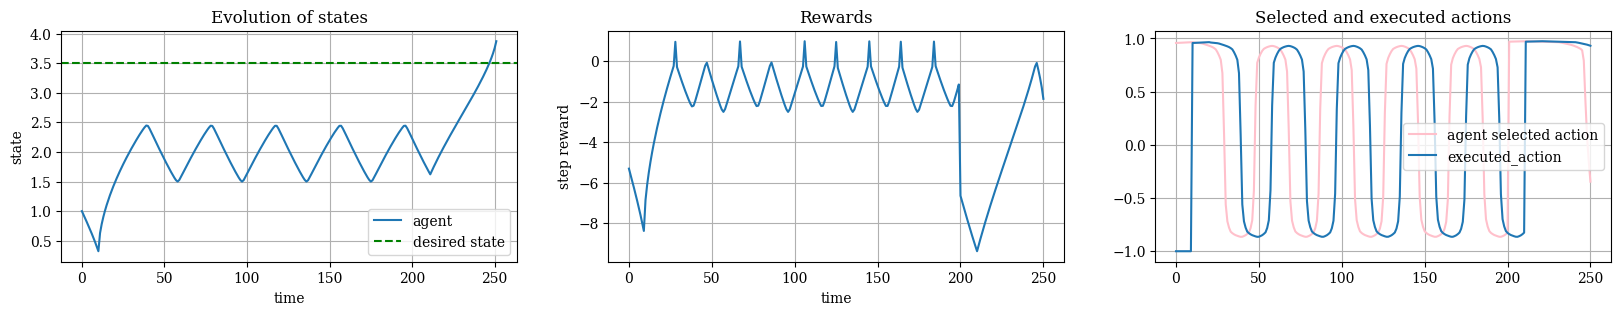

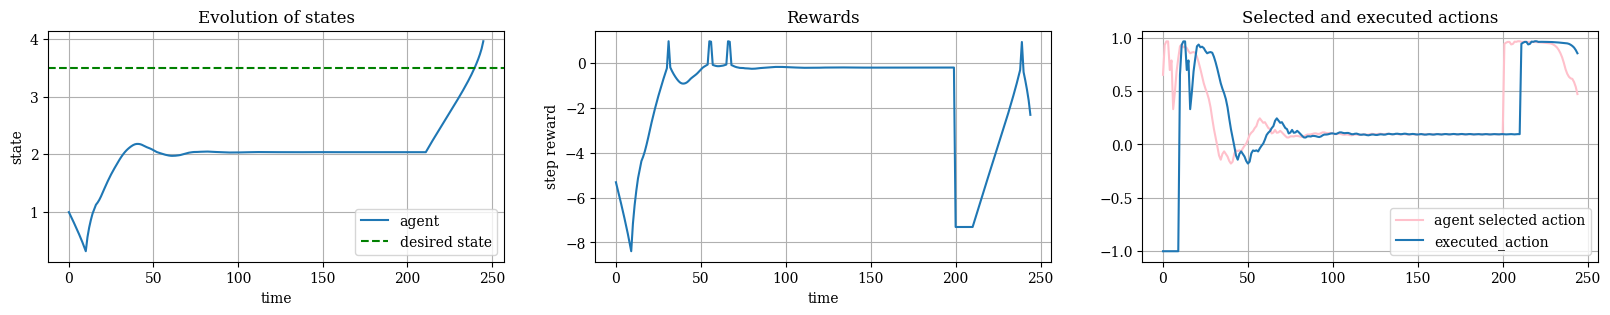

In [9]:
test_env = SphericalTank(desired_state=np.array([3.5,2.0,1.0]), start_state = np.array([1.0]), seed = 56, max_episode_len=1000)
test_env = init_wrappers(test_env, observation_type='setpoint-error', rescale_observation = True)
test_env = DelayAction(test_env, delay = 10)

tank_agent = SAC.load('models\\SphericalTank\\setpoint-error\\randomised\\Desired2.6171\sac.zip')

states, actions, rewards, avg, executed = test_agent(tank_agent, test_env, deterministic=True, state_error=True)
plot_test(test_env,states, actions, rewards, avg, executed)


safe_agent = SAC.load('models\\SphericalTank\\setpoint-error\\randomised\\Desired2.6172\\augsacsafe.zip')
test_env = AugmentState(test_env)
states, actions, rewards, avg, executed = test_agent(safe_agent, test_env, deterministic=True, state_error=True)
plot_test(test_env,states, actions, rewards, avg, executed)